In [94]:
from numpy import *
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report 

## Reading the  wine Dataset

In [40]:
wine = pd.read_csv('wine.csv')

In [42]:
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Preprocessing 

Step 1 : Checking for Missing Values

In [44]:
wine.shape

(178, 15)

In [46]:
wine.isnull().sum()

class_label             0
class_name              0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64

There are no Null values

In [49]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
class_label             178 non-null int64
class_name              178 non-null object
alcohol                 178 non-null float64
malic_acid              178 non-null float64
ash                     178 non-null float64
alcalinity_of_ash       178 non-null float64
magnesium               178 non-null int64
total_phenols           178 non-null float64
flavanoids              178 non-null float64
nonflavanoid_phenols    178 non-null float64
proanthocyanins         178 non-null float64
color_intensity         178 non-null float64
hue                     178 non-null float64
od280                   178 non-null float64
proline                 178 non-null int64
dtypes: float64(11), int64(3), object(1)
memory usage: 20.9+ KB


## Outlier detection 

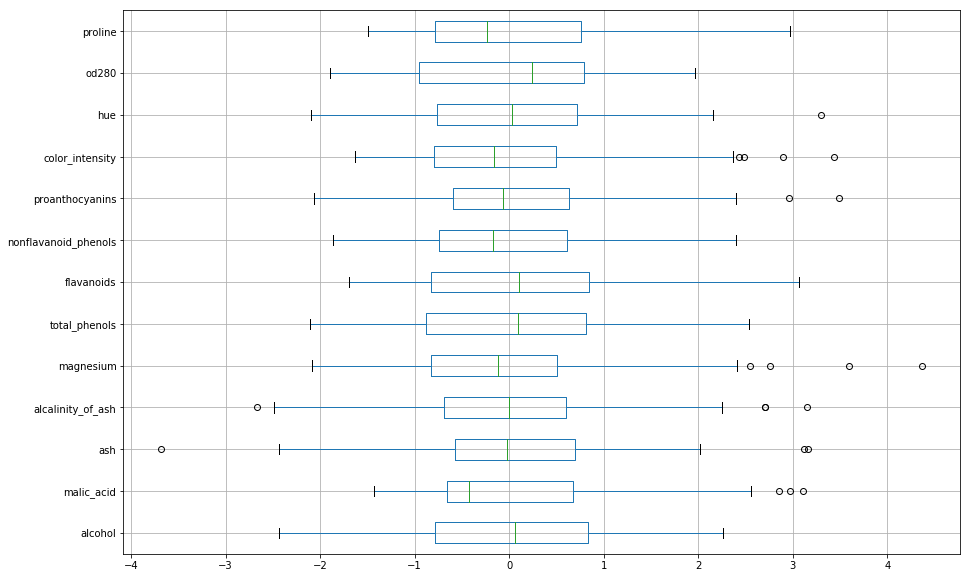

In [74]:
from sklearn.preprocessing import StandardScaler
x=wine.drop(['class_name','class_label'],axis=1)
scaler=StandardScaler().fit(x)
X=pd.DataFrame(scaler.transform(x),columns=x.columns)
X.boxplot(vert=False,figsize=(15,10))

From the above box plot we can infer saying, the columns ( hue, color_intensity, proanthocyanins , magnesium, alcalinity of ash , ash, malic acid) have been detected having outliers. 

## Standardization 
It has been done already in the previous step


## PCA

In [ ]:
y = df['class_label']


In [59]:
from sklearn.decomposition import PCA

In [85]:
pca = PCA()
p = pca.fit(X)

In [72]:
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [75]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [82]:
var = pca.explained_variance_ratio_
var 

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [83]:
cum = np.cumsum(pca.explained_variance_ratio_)
cum 

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

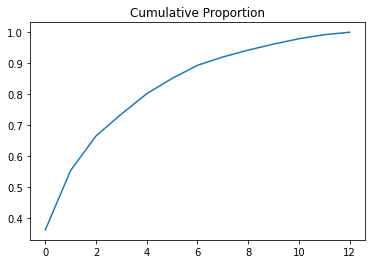

In [93]:
plt.plot(cum)
plt.title("Cumulative Proportion")
plt.show()

From the above plot, we can derive that 90% can be achived when components = 8 

## For 8 variables 

In [100]:
pca8 = PCA(n_components = 8)
principalComponents = pca8.fit_transform(X)

In [103]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['comp1', 'comp2','comp3', 'comp4','comp5', 'comp6','comp7', 'comp8'])

LOgistic Regression

In [105]:
a = principalDf
b = wine['class_label']


In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(a,b  ,test_size=0.2, random_state=1)
X_train.shape


(142, 8)

In [119]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,Y_train)
y_predict = LR.predict(X_test)
y_acc = metrics.accuracy_score(Y_test,y_predict)
print(y_acc)


0.9722222222222222


## Percentage Accuracy with PCA for 8 components = 97.2%

## Without PCA comp = 8

In [121]:
d = X
Xw_train, Xw_test, Yw_train, Yw_test = train_test_split(X,b  ,test_size=0.2, random_state=1)
Xw_train.shape

(142, 13)

In [123]:
LR1 = LogisticRegression()
LR1.fit(Xw_train,Yw_train)
yw_predict = LR1.predict(Xw_test)
yw_acc = metrics.accuracy_score(Yw_test,yw_predict)
print(yw_acc)

1.0


## For components = 5

In [125]:
pca5 = PCA(n_components = 5)
principalComponents5 = pca5.fit_transform(X)

In [128]:
principalDf5 = pd.DataFrame(data = principalComponents5
             , columns = ['comp1', 'comp2','comp3', 'comp4','comp5'])

In [130]:
e = principalDf5
f = wine['class_label']


In [137]:
X5_train, X5_test, Y5_train, Y5_test = train_test_split(e,f  ,test_size=0.2, random_state=1)
X5_train.shape


(142, 5)

In [136]:
LR5 = LogisticRegression()
LR5.fit(X5_train,Y5_train)
y5_predict = LR5.predict(X5_test)
y5_acc = metrics.accuracy_score(Y5_test,y5_predict)
print(y5_acc)

1.0


## For all the components 

In [139]:
pca_all = PCA()
principalComponents_all = pca_all.fit_transform(X)

In [141]:
principalDf_all = pd.DataFrame(data = principalComponents_all
             , columns = ['comp1', 'comp2','comp3', 'comp4','comp5', 'comp6','comp7', 'comp8','comp9', 'comp10','comp11', 'comp12','comp13'])

In [144]:
g = principalDf_all
h = wine['class_label']

In [146]:
Xa_train, Xa_test, Ya_train, Ya_test = train_test_split(g,h ,test_size=0.2, random_state=1)
Xa_train.shape


(142, 13)

In [148]:
LRa = LogisticRegression()
LRa.fit(Xa_train,Ya_train)
ya_predict = LRa.predict(Xa_test)
ya_acc = metrics.accuracy_score(Ya_test,ya_predict)
print(ya_acc)

1.0
